In [1]:
import pandas as pd

raw_df = pd.read_feather("../data/data.feather")
test_items_df = pd.read_csv("../data/test_items.csv",index_col=0)
question_data = pd.read_csv("../data/question_data.csv", sep=';', index_col=0)

In [2]:
question_weights = pd.read_csv('../outputs/question_weights.csv', index_col=0)
q_weights = question_weights.scores.to_list()
len(q_weights)

576

In [3]:
test_item_qs = [item for item in test_items_df.index if item in raw_df.columns]

In [4]:
q_df = raw_df.drop(columns=test_item_qs)
q_df = q_df.filter(regex=r'^q\d+$')

In [5]:
# drop the lowest response q's
N_DROP = 2000
low_response = [col for col in question_data.sort_values('N').iloc[:N_DROP].index if col in q_df.columns]
q_df = q_df.drop(columns=low_response)

In [6]:
# sort by number of categories for easier manipulation later
sorted_num_levels = q_df.apply(lambda x: len(x.cat.categories)).sort_values()
q_df = q_df[sorted_num_levels.index]

In [7]:
question_data.loc[q_df.columns].to_csv('../outputs/filtered_qs.csv')

In [8]:
question_data.loc[q_df.columns]

,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
q19365,If you meet someone and they are everything yo...,Yes,No,NaN,NaN,25296,O,NaN,preference
q47635,Imagine you have a partner who is able to prov...,Yes.,No.,NaN,NaN,23885,O,NaN,preference; descriptive
q165644,What's worse on a first date?,No physical attraction,Nothing to talk about,NaN,NaN,40161,O,NaN,religion/superstition; descriptive
q158,Are you an aspiring actor/artist/writer or oth...,Yes,No,NaN,NaN,40052,O,NaN,descriptive
q15744,Are you a pet person?,Yes,No,NaN,NaN,25704,O,NaN,descriptive
...,...,...,...,...,...,...,...,...,...
q30723,Which is the greatest compliment you could rec...,That you are beautiful/sexy/hot,That you are intelligent,That you are talented,That you are extremely fun to be with,25230,N,NaN,preference; descriptive
q21488,Do you pick up after yourself? Be honest.,Always.,"Yeah, when I have the time.","No, I live in filth.","No, my mom/roommate/partner mostly does it for...",30108,O,"(3, 4), 2, 1",descriptive
q274,What's the highest level of education you've c...,Graduate School,College,High School,Junior High,31706,O,NaN,descriptive
q218,Should prostitution be legal?,"Yes, absolutely","Yes, only if it were regulated",I don't think so,ABSOLUTELY NOT,25694,O,NaN,politics; religion/superstition


In [9]:
q_df

,q19365,q47635,q165644,q158,q15744,q155,q15478,q47764,q19737,q171,...,q33602,q34517,q35355,q28754,q30207,q30723,q21488,q274,q218,q265
0,NaN,NaN,Nothing to talk about,NaN,Yes,NaN,NaN,NaN,Yes,NaN,...,NaN,NaN,"I'm open, but I don't get too crazy.",At least 2 years,"No, it's fine.",NaN,NaN,Graduate School,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,Yes.,Nothing to talk about,NaN,NaN,NaN,NaN,Yes.,Yes,NaN,...,"Yes, almost always",NaN,NaN,NaN,"No, it's underrated.",NaN,NaN,College,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Get the number of unique levels per column
num_levels = q_df.nunique()

# Sort columns by unique levels
sorted_num_levels = num_levels.sort_values()

# Find the indices where the level count changes
level_counts = sorted_num_levels.values
diff = level_counts[1:] != level_counts[:-1]
border_indices = list(diff.nonzero()[0] + 1)  # +1 because diff is between elements

# For example, print the borders and corresponding levels
print("Border indices where level count changes:", border_indices)
print("Levels at borders:", level_counts[border_indices])

# You can use these indices to split the sorted columns into dfs as needed

Border indices where level count changes: [np.int64(252), np.int64(392)]
Levels at borders: [3 4]


In [11]:
import numpy as np

non_nan = ~q_df.isna()
non_nan_indices = np.flatnonzero(non_nan.values)

np.random.seed(0)
TEST_SIZE = 0.2
test_size = int(len(non_nan_indices) * TEST_SIZE)
test_mask_flat = np.random.choice(non_nan_indices, size=test_size, replace=False)

test_mask = np.zeros_like(q_df.values, dtype=bool)
test_mask.flat[test_mask_flat] = True

# mask some cells that serve as our test set
df_masked = q_df.mask(test_mask)


In [12]:
non_nan.shape

(68371, 576)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore'), q_df.columns),
    ],
    sparse_threshold=1.0
)

def transform_and_drop(df):
    X = preprocessor.fit_transform(df)

    # the sklearn onehot encoder doesn't have an option to not encode nans
    feature_names = preprocessor.get_feature_names_out()
    cols_to_keep = [i for i, name in enumerate(feature_names) if not name.endswith('_nan')]
    X = X[:, cols_to_keep]
    return X

X_combined = transform_and_drop(df_masked)

In [14]:
import numpy as np
from scipy import sparse

# Original mask (shape: n_users x n_original_questions)

# convert the original mask to a mask over the onehots
def expand_mask(mask):
    mask_expanded = []
    for col_idx, col in enumerate(q_df.columns):
        n_categories = len(q_df[col].cat.categories)
        # Repeat mask along a new axis (shape: n_users x n_categories)
        mask_repeated = np.repeat(mask[:, col_idx][:, np.newaxis], n_categories, axis=1)
        mask_expanded.append(mask_repeated)
        # sanity check
        assert mask_repeated.shape[0] == 68371

    # Stack horizontally (shape: n_users x n_encoded_features)
    mask_expanded = np.hstack(mask_expanded)
    return mask_expanded

# Convert to sparse matrix (if X_combined is sparse)
test_mask_expanded = expand_mask(test_mask)
test_mask_sparse = sparse.csr_matrix(test_mask_expanded)

original_mask = expand_mask(non_nan.values)

In [15]:
# sanity check

print(test_mask_sparse.shape, X_combined.shape)
X_combined[test_mask_sparse.nonzero()].any()

(68371, 1660) (68371, 1660)


np.False_

In [16]:
# expand loss weights:

def expand_loss_weights(weights):
    weights_expanded = []
    for col_idx, col in enumerate(q_df.columns):
        n_categories = len(q_df[col].cat.categories)
        # Repeat mask along a new axis (shape: n_users x n_categories)
        weights_expanded += ([weights[col_idx]] * n_categories)
        # sanity check
    assert len(weights_expanded) == 1660
    return weights_expanded

weights_expanded = expand_loss_weights(q_weights)
_, test_mask_qs = np.nonzero(test_mask_expanded)
loss_weights_test = np.array(weights_expanded)[test_mask_qs]
loss_weights_test.shape

(10444820,)

### data cleaned, ready for naive bayes

In [17]:
pr_q_answered = df_masked.notna().mean()
pr_user_answered = df_masked.notna().mean(axis=1)

In [18]:
feature_names = preprocessor.get_feature_names_out()

In [19]:
feature_names = preprocessor.get_feature_names_out()
kept_features = [item[8:].split('_') for item in feature_names if not item.endswith('_nan')]

In [20]:
# demonstration of how the naive imputation model works

for user, feature in zip(*test_mask_sparse.nonzero()):
    question, option = kept_features[feature]
    print(user, question, option)
    print("pr(user answers)=", pr_user_answered[user])
    print("pr(question gets answered)=", pr_q_answered[question])
    print("pr(option i selected | question K gets answered)=", df_masked[question].value_counts(normalize=True)[option])
    print("take the prodcut of these")
    break

0 q44639 No
pr(user answers)= 0.3177083333333333
pr(question gets answered)= 0.6423483640724869
pr(option i selected | question K gets answered)= 0.38171137119176646
take the prodcut of these


In [21]:
questions = np.array([q for q, o in kept_features])
options   = np.array([o for q, o in kept_features])

option_probs = {
    q: df_masked[q].value_counts(normalize=True).reindex(q_df[q].cat.categories, fill_value=0)
    for q in q_df.columns
}
option_probs_df = pd.DataFrame(option_probs).T  # index: question, columns: option. super redundant but helps vectorize the operations below

users_idx, features_idx = test_mask_sparse.nonzero()

q_for_masked = questions[features_idx]
o_for_masked = options[features_idx]

pr_user_vals = pr_user_answered.values[users_idx]
pr_q_vals    = pr_q_answered[q_for_masked].values
pr_option_vals = option_probs_df.values[
    option_probs_df.index.get_indexer(q_for_masked),
    option_probs_df.columns.get_indexer(o_for_masked)
]

# Vectorized naive bayes
naive_imputed_values = pr_user_vals * pr_q_vals * pr_option_vals


In [22]:
# compare hidden test values to real values
X_not_masked = transform_and_drop(q_df)

# check:
X_not_masked.shape == X_combined.shape

True

In [23]:
(np.asarray(X_not_masked[test_mask_sparse] - naive_imputed_values).ravel()**2).shape

(10444820,)

In [24]:
# MSE
mse_naive = np.average(np.asarray(X_not_masked[test_mask_sparse] - naive_imputed_values).ravel()**2, weights=loss_weights_test)
mse_naive

np.float64(0.27249386668583225)

In [25]:
# this is the one that Yoram explained to me, but I think the one above makes more sense.

row_mean = X_combined.mean(axis=1).ravel()
col_mean = X_combined.mean(axis=0).ravel()

naive_imputation2 = np.asarray(row_mean).ravel()[users_idx] * np.asarray(col_mean).ravel()[features_idx]

mse_naive2 = np.average(np.asarray(X_not_masked[test_mask_sparse] - naive_imputation2).ravel()**2, weights=loss_weights_test)
mse_naive2

np.float64(0.31765224077267906)

### imputing values randomly

In [26]:
# random
mse_random = np.average(np.asarray(X_not_masked[test_mask_sparse] - np.random.uniform(size=naive_imputed_values.shape)).ravel() **2, weights=loss_weights_test)
mse_random

np.float64(0.3333067725592099)

In [27]:
# impute as as constant, mean of test data:

train_data = X_not_masked[original_mask & ~test_mask_sparse.toarray()]
mean_val = train_data.mean()

mse_constant = np.average(np.asarray(X_not_masked[test_mask_sparse] - (np.zeros_like(naive_imputed_values) + mean_val)).ravel() **2, weights=loss_weights_test)
mse_constant

np.float64(0.22617873756601115)

### imputing as modal answer

In [28]:
def get_mode(series):
    return series.mode().iloc[0]

df_modal_imputed = df_masked.apply(lambda col: col.fillna(get_mode(col)))
X_modal = transform_and_drop(df_modal_imputed)

In [29]:
# MSE
mse_modal = np.average(np.asarray(X_not_masked[test_mask_sparse] - X_modal[test_mask_sparse]).ravel() **2, weights=loss_weights_test)
mse_modal

np.float64(0.2552871884444088)

### low rank approximation method!

In [30]:
import torch
import torch.optim as optim
import torch.nn.functional as F

def torch_avg(tensor, weights):
    assert tensor.shape == weights.shape
    return torch.sum(tensor * weights) / torch.sum(weights)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [54]:
# Convert sparse matrices to PyTorch tensors
X_combined_tensor = torch.tensor(X_combined.toarray(), dtype=torch.float32).to(device)
test_mask_tensor = torch.tensor(test_mask_sparse.toarray(), dtype=torch.bool).to(device)
train_mask_tensor = torch.tensor(original_mask, dtype=torch.bool).to(device) & ~test_mask_tensor

train_mask_qs = torch.nonzero(train_mask_tensor)[:,1]
loss_weights_train = torch.tensor(weights_expanded)[train_mask_qs.cpu()].to(device)
loss_weights_test_tensor = torch.from_numpy(loss_weights_test).to(device)

test_values_tensor = torch.from_numpy(X_not_masked[test_mask_sparse]).to(device)

In [86]:
from tqdm import tqdm, trange

# Hyperparameters
rank = 5  # Rank of the approximation (adjust as needed)
learning_rate = 0.2
epochs = 50

# Initialize low-rank matrices B and C
n_users, n_features = X_combined.shape
B = torch.randn(n_users, rank, requires_grad=True, device=device)
C = torch.randn(rank, n_features, requires_grad=True, device=device)
X_hat = torch.mm(B, C)

# Optimizer
optimizer = optim.Adam([B, C], lr=learning_rate)

@torch.compile
def split_and_softmax(X):
    split_sizes = [border_indices[0]] + \
                [border_indices[i+1] - border_indices[i] for i in range(len(border_indices)-1)] + \
                [q_df.shape[1] - border_indices[-1]]

    split_sizes = [item * (i+2) for i, item in enumerate(split_sizes)]
    split_tensors = torch.split(X, split_sizes, dim=1)

    processed_tensors = []
    for i, tensor in enumerate(split_tensors):
        options_per_question = 2 + i  # 2 for first split, 3 for second, 4 for third
        n_questions = tensor.shape[1] // options_per_question
        
        # Reshape to (n_users, n_questions, options_per_question)
        reshaped = tensor.view(-1, n_questions, options_per_question)
        
        # Apply softmax along the last dimension
        softmaxed = F.softmax(reshaped, dim=-1)
        processed_tensors.append(softmaxed)
    
    flattened_tensors = [tensor.view(tensor.shape[0], -1) for tensor in processed_tensors]
    X_softmaxed = torch.cat(flattened_tensors, dim=1)
    return X_softmaxed

def get_test_loss(X_hat):
    X_imputed = X_hat

    # Evaluate on test set
    imputed_test_values = X_imputed[test_mask_tensor]
    mse_low_rank = torch_avg(((test_values_tensor - imputed_test_values) ** 2).ravel(), loss_weights_test_tensor)
    return mse_low_rank.item()

# Training loop
def train_loop():
    train_losses = []
    test_losses = []
    for epoch in trange(epochs):
        optimizer.zero_grad()
        
        # Reconstruct X_hat = B @ C
        X_hat = torch.mm(B, C)
        X_hat = split_and_softmax(X_hat) # this is the right inductive bias and it also dratically lowers the loss

        # Compute loss only on observed entries (not masked for testing)
        loss = torch_avg((X_hat[train_mask_tensor] - X_combined_tensor[train_mask_tensor]) ** 2, weights=loss_weights_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        test_losses.append(get_test_loss(X_hat))
        # print(f"Epoch {epoch}, Loss: {loss.item()}")
    return X_hat, train_losses, test_losses

X_hat, train_losses, test_losses = train_loop()

100%|██████████| 50/50 [00:05<00:00, 10.00it/s]


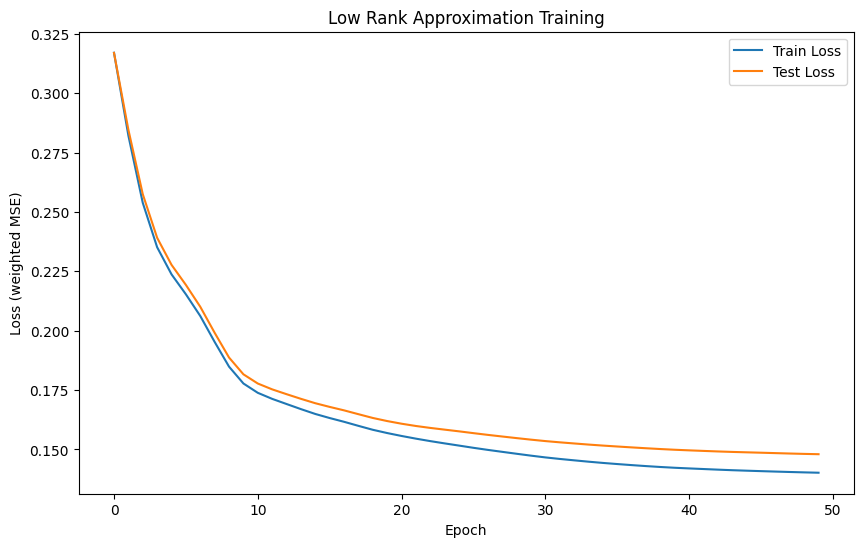

In [87]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (weighted MSE)')
plt.title('Low Rank Approximation Training')
plt.legend()
plt.savefig('../outputs/lora_loss.pdf')
plt.show()

In [88]:
mse_low_rank = get_test_loss(X_hat)
print(f"Low-rank MSE: {mse_low_rank}")

Low-rank MSE: 0.1480188535867763


### autoencoder without minibatching

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
input_dim = X_combined_tensor.shape[1]
encoding_dim = 5
learning_rate = 0.001
epochs = 50

# Create the autoencoder model
model = Autoencoder(input_dim, encoding_dim).to(device)

# Loss function and optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses_ae=[]
test_losses_ae=[]
for epoch in trange(epochs):
    optimizer.zero_grad()
    # Forward pass
    outputs = model(X_combined_tensor)
    outputs_softmax = split_and_softmax(outputs)
    
    loss = torch_avg((outputs_softmax[train_mask_tensor] - X_combined_tensor[train_mask_tensor]) ** 2, weights=loss_weights_train)
    
    # Backward pass and optimize
    loss.backward()
    optimizer.step()
    
    test_loss = get_test_loss(outputs_softmax)
    train_losses_ae.append(loss.item())
    test_losses_ae.append(test_loss)
    
    
# Use the trained model for imputation
model.eval()
with torch.no_grad():
    imputed_data = model(X_combined_tensor)
    imputed_data_softmax = split_and_softmax(imputed_data)

mse_autoencoder = get_test_loss(imputed_data_softmax)
print(f"Autoencoder MSE: {mse_autoencoder}")

100%|██████████| 50/50 [00:07<00:00,  6.67it/s]

Autoencoder MSE: 0.1510528948938642


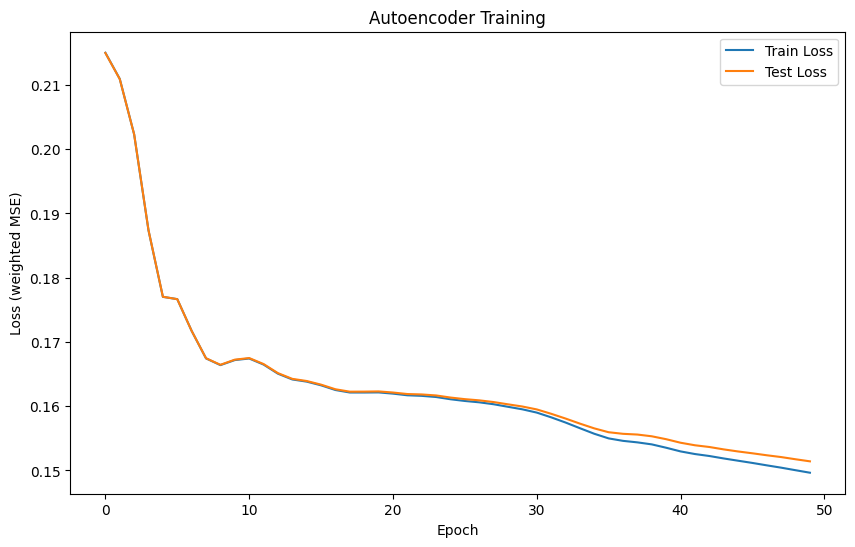

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses_ae, label='Train Loss')
plt.plot(test_losses_ae, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (weighted MSE)')
plt.title('Autoencoder Training')
plt.legend()
plt.savefig('../outputs/ae_loss.pdf')
plt.show()

### compare MSE's

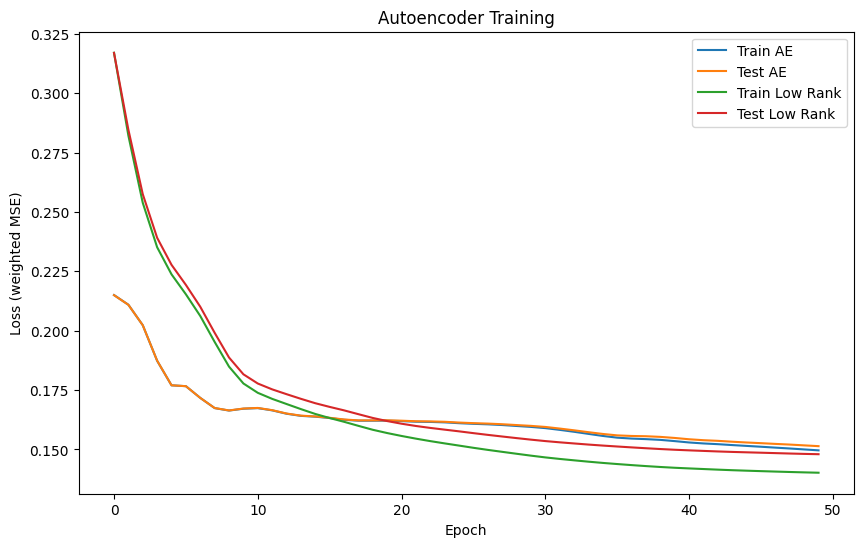

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses_ae, label='Train AE')
plt.plot(test_losses_ae, label='Test AE')
plt.plot(train_losses, label='Train Low Rank')
plt.plot(test_losses, label='Test Low Rank')
plt.xlabel('Epoch')
plt.ylabel('Loss (weighted MSE)')
plt.title('Autoencoder Training')
plt.legend()
plt.savefig('../outputs/compare_loss.pdf')
plt.show()

/tmp/ipykernel_16433/464840917.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=e_series.index, y=e_series.values, palette='viridis')


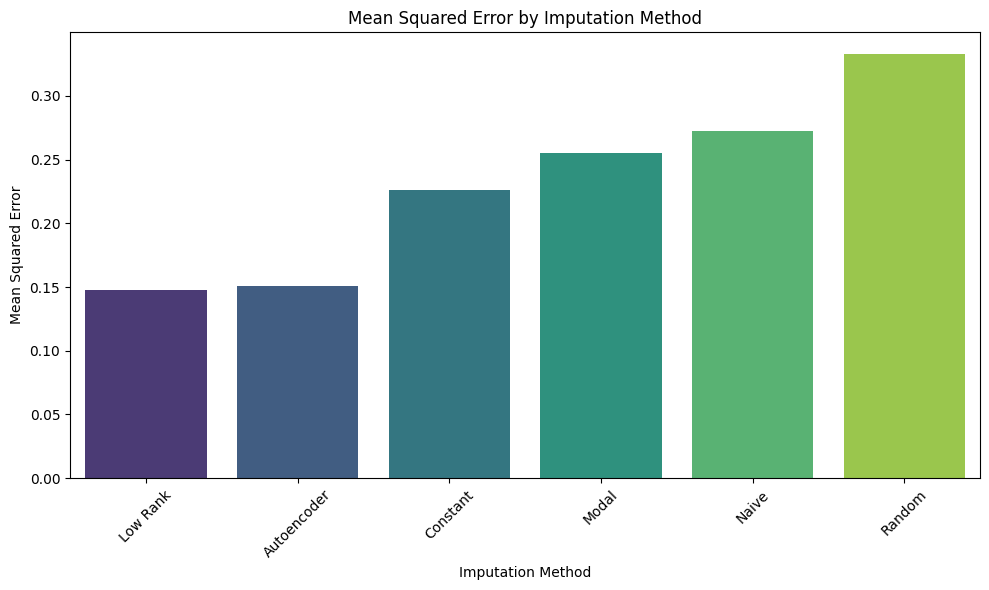

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

errors = {"Autoencoder": mse_autoencoder,
'Constant': mse_constant,
'Low Rank': mse_low_rank,
'Modal': mse_modal,
'Naive': mse_naive,
# 'naive2': mse_naive2,
'Random': mse_random}

e_series = pd.Series(errors).sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=e_series.index, y=e_series.values, palette='viridis')
plt.title('Mean Squared Error by Imputation Method')
plt.xlabel('Imputation Method')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../outputs/imputers.pdf')

plt.show()

### save the low rank imputation

In [101]:
imputed_onehot = X_hat.detach().cpu().numpy()
np.save('../outputs/imputed_lora.npy', imputed_onehot)

In [103]:
with_indicators = np.concatenate([imputed_onehot, q_df.isna().values], axis=1)
np.save('../outputs/imputed_lora_indicators.npy', with_indicators)